In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

In [24]:
kvec = np.logspace(-5,np.log10(20),50)
print(kvec[-1])
test = Class()
h = 0.67
test_dict = {"gauge":"sync",
             "h":h,
             "output":"nCl,vTk,dTk,mTk",#,vCTk",
             'z_max_pk':1000,
             #"z_pk":"1000.0,0.0",
             'k_output_values':str(kvec).strip('[]')}
test.set(test_dict)
test.compute()
tf = test.get_transfer()#z=20)

print(tf['k (h/Mpc)'][-1])

20.000000000000004
1.7286131569816816


1.7286131569816816


Text(0.5, 0, 'k [1/Mpc]')

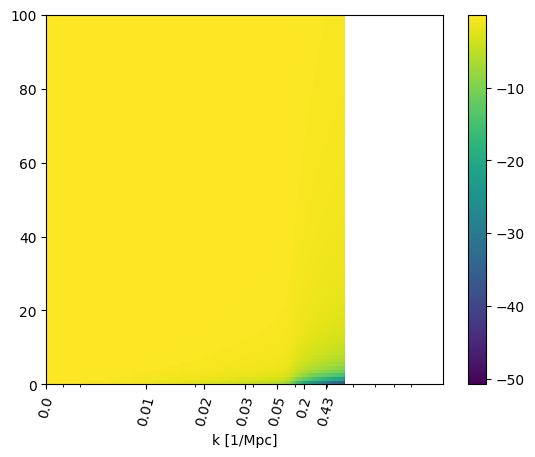

In [28]:
z_num = 100
k_len = len(tf['k (h/Mpc)'])
X = np.zeros([z_num,k_len])
#print(X)
#plt.imshow()

for z in range(0,z_num):
    #z_num =z#int( z/100 - 1)
    tfz = test.get_transfer(z)
    for k in range(len(tfz['k (h/Mpc)'])):
        #print(tf["d_cdm"][k])
        #print(tfz["d_cdm"][k])
        X[z][k] = tfz["d_cdm"][k] /(1000)

#plt.imshow(X)
#X = np.ndarray([np.array([1,0.5,0,4]),np.array([1,4,6])])#,"dtype=object"])
#plt.imshow( np.random.random((100, 100)))#, cmap = 'rainbow' , interpolation = 'bilinear')
#p = np.random.random((100, 100))
#print(type(p))
c = plt.pcolormesh(X)
plt.colorbar(c)
#X
K = test.get_transfer()["k (h/Mpc)"]
print(K[-1])
#print(tfz["k (h/Mpc)"])
#print(len(tfz["k (h/Mpc)"]))
#plt.xticks(K)
plt.xscale("log")
u = 8
DU = int(len(K) / u)
plt.xticks([i*DU for i in range(1,u)],[np.round(K[i*DU],2) for i in range(1,u)],rotation=75)
# K[100],K[200],K[300],K[400]])
plt.xlabel("k [1/Mpc]")

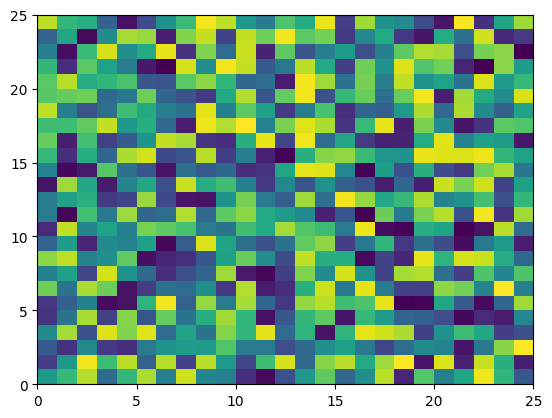

In [4]:
Z = np.random.rand(25, 25)

#print(Z)
plt.pcolormesh(Z)
 

In [5]:
tz = test.get_transfer_and_k_and_z(1,1)
#print(tz)
#print(tz.keys())

In [6]:
pb0 = test.get_perturbations()["scalar"][0]

In [7]:
pb0.keys()

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm'])